# Работа с кастомным набором данных

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb
%matplotlib inline

In [2]:
device = torch.device('cuda:0')

# Data source: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip
<br>
# Data hierarchy
<br>
  
  pizza_steak_sushi/ <- overall dataset folder
  
    train/ <- training images
        pizza/ <- class name as folder name
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- testing images
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...
            <br>

In [50]:
# check data
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [51]:
image_path = "Dataset\pizza_steak_sushi"
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Dataset\pizza_steak_sushi'.
There are 3 directories and 0 images in 'Dataset\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'Dataset\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'Dataset\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'Dataset\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'Dataset\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'Dataset\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'Dataset\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'Dataset\pizza_steak_sushi\train\sushi'.


In [52]:
# Create train and test path data
train_dir = image_path + "/train"
test_dir = image_path + "/test"

train_dir, test_dir

('Dataset\\pizza_steak_sushi/train', 'Dataset\\pizza_steak_sushi/test')

# Visualize an image

In [56]:
from pathlib import Path
import glob
import random
from PIL import Image


In [76]:
def get_image():
    image_path_list = list(glob.glob(image_path + "/*/*/*.jpg"))
    random_image_path = random.choice(image_path_list)
    image_class = Path(random_image_path).parent.stem
    img = Image.open(random_image_path)
    return img, image_class

def get_random_image_use_PIL():
    img, image_class = get_image()
    
    print(f"Random image path: {random_image_path}")
    print(f"Image class: {image_class}")
    print(f"Image height: {img.height}") 
    print(f"Image width: {img.width}")
    
    img
    display(img)

def show_random_image_use_PLT():
    
    img, image_class = get_image()
    img_as_array = np.asarray(img)

    plt.figure(figsize=(10, 7))
    plt.imshow(img_as_array)
    plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
    plt.axis(False);

Random image path: Dataset\pizza_steak_sushi\train\pizza\3109486.jpg
Image class: sushi
Image height: 512
Image width: 512


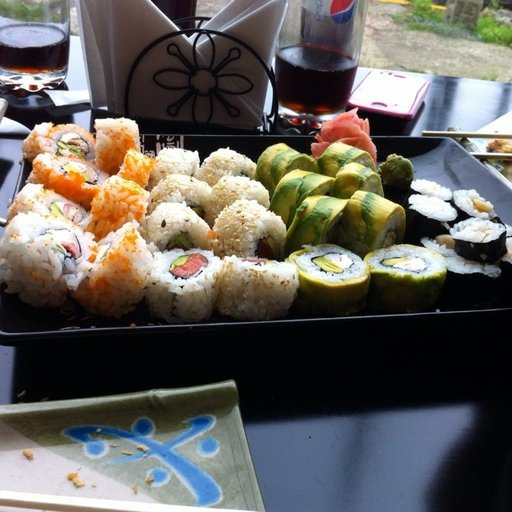

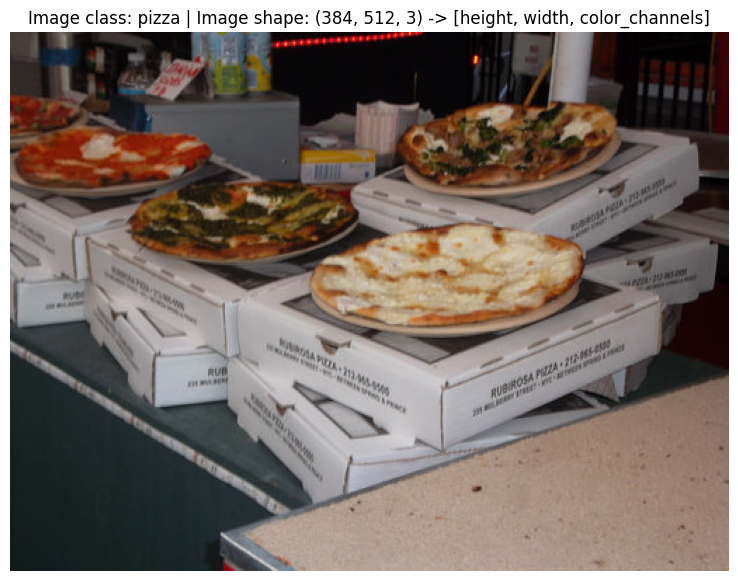

In [77]:
get_random_image_use_PIL()
show_random_image_use_PLT()

# Transforming data 

In [78]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [89]:
# create tranform for data
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [90]:
# def view transform image
def plot_transformed_images(image_paths, transform, n=3, seed=42):
 
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {Path(image_path).parent.stem}", fontsize=16)



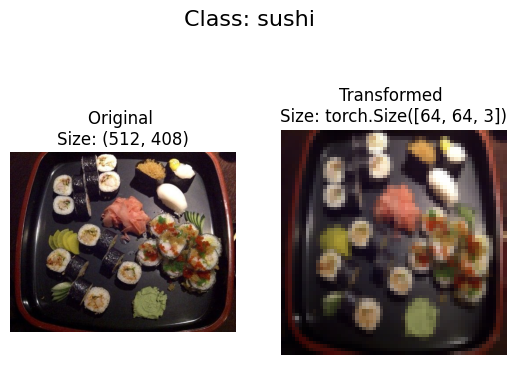

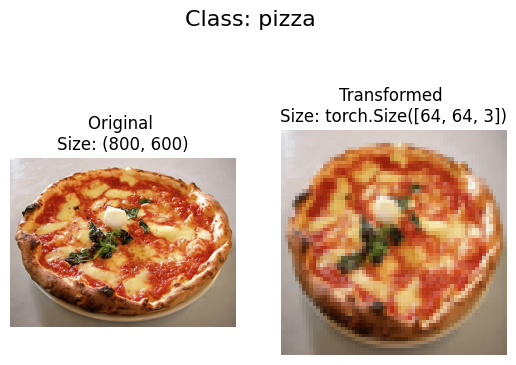

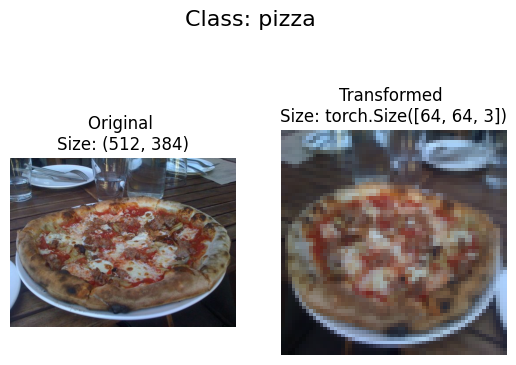

In [91]:
plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

# Load Image Using ImageFolder

In [92]:
# Use ImageFolder to create dataset(s)

train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: Dataset\pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: Dataset\pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [94]:
# get clasesses name
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [95]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [96]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [97]:
# view image to matplotlib
def view_image_in_dataload():
    # Rearrange the order of dimensions
    img, label = train_data[0][0], train_data[0][1]
    img_permute = img.permute(1, 2, 0)

    # Print out different shapes (before and after permute)
    print(f"Original shape: {img.shape} -> [color_channels, height, width]")
    print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

    # Plot the image
    plt.figure(figsize=(10, 7))
    plt.imshow(img.permute(1, 2, 0)) # CHW -> HWC
    plt.axis("off")
    plt.title(class_names[label], fontsize=14);

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


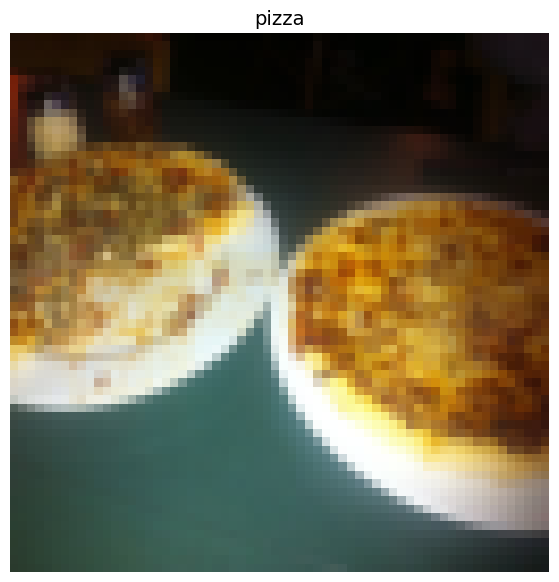

In [98]:
view_image_in_dataload()

# Load image use DataLoader

In [100]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, 
                              num_workers=1,
                              shuffle=True) 

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2174b9c7d60>,
 <torch.utils.data.dataloader.DataLoader at 0x2174d751450>)

In [101]:
# get info 
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# Create custom Dataset Loader

In [102]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [104]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path  + "/train"))])
print(f"Class names found: {class_names_found}")

Target directory: Dataset\pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [107]:
# Createa functons "find classes"
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    # make list 
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
   
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    #make dict    
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx #list classes and dict classes

In [108]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [109]:
from torch.utils.data import Dataset

In [111]:
class ImageFolderCustom(Dataset):
    
    def __init__(self, targ_dir: str, format_data:str, transform=None) -> None:
        
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*." + format_data)) 
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir) # use def

   
    def load_image(self, index: int) -> Image.Image:
        
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name 
        class_idx = self.class_to_idx[class_name]

       
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [119]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [120]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      format_data = "jpg",
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     format_data = "jpg",
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x2174d812fe0>,
 <__main__.ImageFolderCustom at 0x2174baa1d80>)

In [121]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [122]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [123]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [125]:
# create def display_random_images
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    #Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
   
    if seed:
        random.seed(seed)


    random_samples_idx = random.sample(range(len(dataset)), k=n)

  
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [color_channels, height, width]

    
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

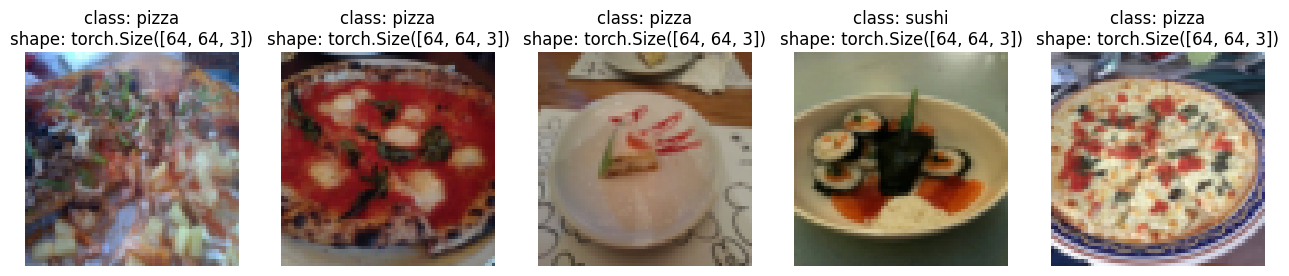

In [126]:
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

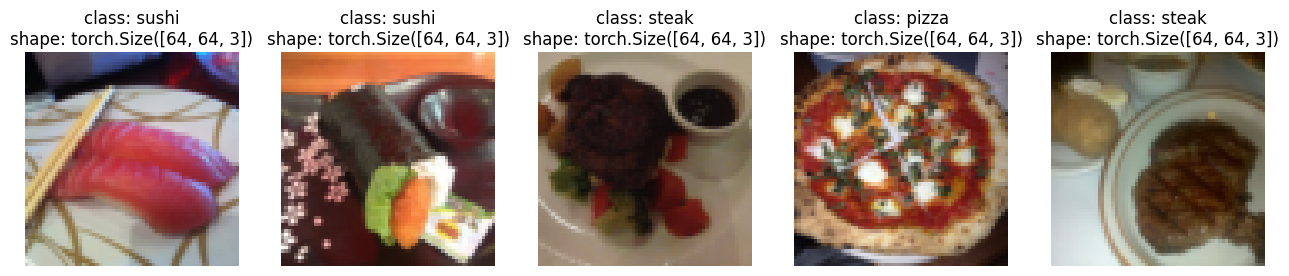

In [127]:
display_random_images(train_data_custom, 
                      n=5, 
                      classes=class_names,
                      seed=None) 

In [129]:
# Using custom ImageFoldet to Dataloader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x2174d7514b0>,
 <torch.utils.data.dataloader.DataLoader at 0x2174d750820>)

In [130]:
img_custom, label_custom = next(iter(train_dataloader_custom))

print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# Check Othre forms transforms data (data augmentation)
source https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvements
<br>
examples https://pytorch.org/vision/main/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py


In [139]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.AugMix(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor() 
    
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

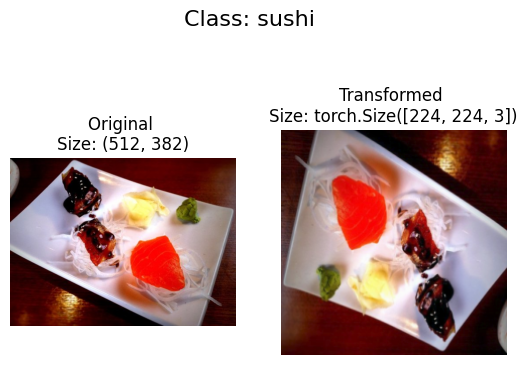

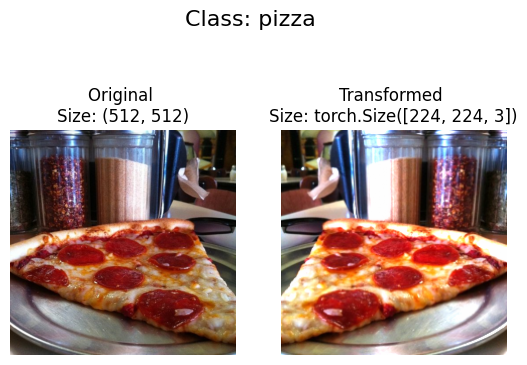

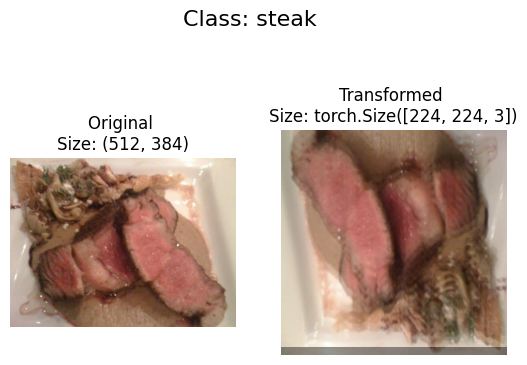

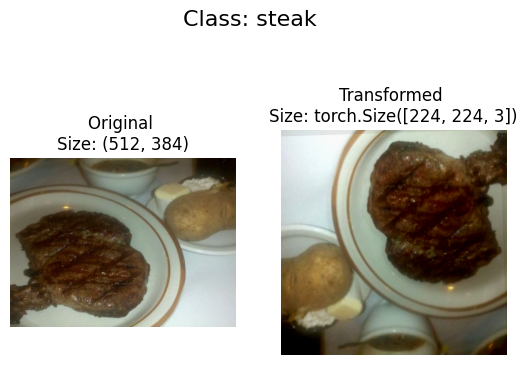

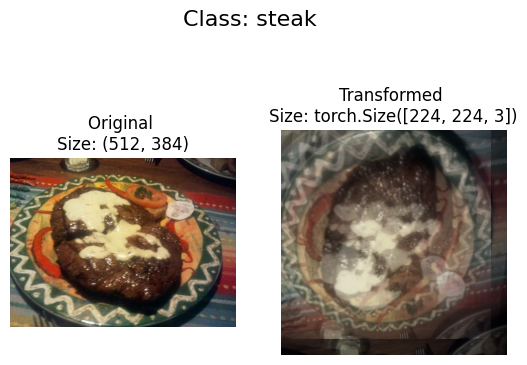

In [140]:
image_path_list = list(glob.glob(image_path + "/*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=5,
    seed=None
)

In [203]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.AugMix(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() 
    
])

train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      format_data = "jpg",
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     format_data = "jpg",
                                     transform=simple_transform)

BATCH_SIZE = 32
train_dataloader_simple = DataLoader(train_data_custom, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=0)

test_dataloader_simple = DataLoader(test_data_custom, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=0)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x2175ec79f30>,
 <torch.utils.data.dataloader.DataLoader at 0x2175ec7a140>)

# Use models TinyVGG (Part 1)

In [204]:
class TinyVGG(nn.Module):
   
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

#torch.manual_seed(42)


In [205]:
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data_custom.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [206]:
#GET SUMMARY MODEL INFO
# !pip install torchinfo
import torchinfo
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

# Create train and loss loop

In [207]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
   
    model.train()
    
   
    train_loss, train_acc = 0, 0
    
    
    for batch, (X, y) in enumerate(dataloader):
       
        X, y = X.to(device), y.to(device)

        
        y_pred = model(X)

        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        
        optimizer.zero_grad()

        
        loss.backward()

        
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [208]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    
    model.eval() 
    
    
    test_loss, test_acc = 0, 0
    
    
    with torch.inference_mode():
       
        for batch, (X, y) in enumerate(dataloader):
           
            X, y = X.to(device), y.to(device)
    
           
            test_pred_logits = model(X)

           
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

# Create train functions

In [209]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # Create empty results dictionary (analog history or Keras)
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        #train block
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        #test block
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # print result epochs
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

In [210]:
from timeit import default_timer as timer 
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)



start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  2%|█▋                                                                                 | 1/50 [00:01<01:23,  1.70s/it]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2617 | test_loss: 1.1378 | test_acc: 0.2604


  4%|███▎                                                                               | 2/50 [00:03<01:26,  1.80s/it]

Epoch: 2 | train_loss: 1.1016 | train_acc: 0.3203 | test_loss: 1.1516 | test_acc: 0.1979


  6%|████▉                                                                              | 3/50 [00:05<01:23,  1.77s/it]

Epoch: 3 | train_loss: 1.0936 | train_acc: 0.2930 | test_loss: 1.1507 | test_acc: 0.2604


  8%|██████▋                                                                            | 4/50 [00:07<01:20,  1.75s/it]

Epoch: 4 | train_loss: 1.1077 | train_acc: 0.3047 | test_loss: 1.1436 | test_acc: 0.2604


 10%|████████▎                                                                          | 5/50 [00:08<01:18,  1.73s/it]

Epoch: 5 | train_loss: 1.1126 | train_acc: 0.3047 | test_loss: 1.1250 | test_acc: 0.2604


 12%|█████████▉                                                                         | 6/50 [00:10<01:15,  1.73s/it]

Epoch: 6 | train_loss: 1.0971 | train_acc: 0.3047 | test_loss: 1.1061 | test_acc: 0.2604


 14%|███████████▌                                                                       | 7/50 [00:12<01:13,  1.71s/it]

Epoch: 7 | train_loss: 1.1011 | train_acc: 0.2852 | test_loss: 1.1040 | test_acc: 0.1979


 16%|█████████████▎                                                                     | 8/50 [00:13<01:13,  1.74s/it]

Epoch: 8 | train_loss: 1.1004 | train_acc: 0.2930 | test_loss: 1.0995 | test_acc: 0.1979


 18%|██████████████▉                                                                    | 9/50 [00:15<01:11,  1.75s/it]

Epoch: 9 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.0991 | test_acc: 0.1979


 20%|████████████████▍                                                                 | 10/50 [00:17<01:09,  1.74s/it]

Epoch: 10 | train_loss: 1.0995 | train_acc: 0.3047 | test_loss: 1.0976 | test_acc: 0.5312


 22%|██████████████████                                                                | 11/50 [00:19<01:07,  1.72s/it]

Epoch: 11 | train_loss: 1.0988 | train_acc: 0.2812 | test_loss: 1.0981 | test_acc: 0.5218


 24%|███████████████████▋                                                              | 12/50 [00:20<01:05,  1.72s/it]

Epoch: 12 | train_loss: 1.0990 | train_acc: 0.3125 | test_loss: 1.0992 | test_acc: 0.2917


 26%|█████████████████████▎                                                            | 13/50 [00:22<01:04,  1.73s/it]

Epoch: 13 | train_loss: 1.0986 | train_acc: 0.3125 | test_loss: 1.0981 | test_acc: 0.3400


 28%|██████████████████████▉                                                           | 14/50 [00:24<01:02,  1.74s/it]

Epoch: 14 | train_loss: 1.0976 | train_acc: 0.4219 | test_loss: 1.0989 | test_acc: 0.2604


 30%|████████████████████████▌                                                         | 15/50 [00:26<01:01,  1.75s/it]

Epoch: 15 | train_loss: 1.0959 | train_acc: 0.4258 | test_loss: 1.1007 | test_acc: 0.2604


 32%|██████████████████████████▏                                                       | 16/50 [00:27<00:59,  1.74s/it]

Epoch: 16 | train_loss: 1.0904 | train_acc: 0.4258 | test_loss: 1.1120 | test_acc: 0.2604


 34%|███████████████████████████▉                                                      | 17/50 [00:29<00:58,  1.77s/it]

Epoch: 17 | train_loss: 1.1161 | train_acc: 0.3047 | test_loss: 1.1224 | test_acc: 0.2604


 36%|█████████████████████████████▌                                                    | 18/50 [00:31<00:57,  1.81s/it]

Epoch: 18 | train_loss: 1.0969 | train_acc: 0.3047 | test_loss: 1.0981 | test_acc: 0.2604


 38%|███████████████████████████████▏                                                  | 19/50 [00:33<00:56,  1.82s/it]

Epoch: 19 | train_loss: 1.1018 | train_acc: 0.3047 | test_loss: 1.0879 | test_acc: 0.2604


 40%|████████████████████████████████▊                                                 | 20/50 [00:35<00:53,  1.80s/it]

Epoch: 20 | train_loss: 1.0932 | train_acc: 0.4219 | test_loss: 1.0886 | test_acc: 0.2396


 42%|██████████████████████████████████▍                                               | 21/50 [00:36<00:51,  1.76s/it]

Epoch: 21 | train_loss: 1.1004 | train_acc: 0.3047 | test_loss: 1.0892 | test_acc: 0.2604


 44%|████████████████████████████████████                                              | 22/50 [00:38<00:48,  1.75s/it]

Epoch: 22 | train_loss: 1.0921 | train_acc: 0.4336 | test_loss: 1.0970 | test_acc: 0.2812


 46%|█████████████████████████████████████▋                                            | 23/50 [00:40<00:47,  1.75s/it]

Epoch: 23 | train_loss: 1.0909 | train_acc: 0.3203 | test_loss: 1.0971 | test_acc: 0.2812


 48%|███████████████████████████████████████▎                                          | 24/50 [00:42<00:45,  1.74s/it]

Epoch: 24 | train_loss: 1.0823 | train_acc: 0.3203 | test_loss: 1.0414 | test_acc: 0.3314


 50%|█████████████████████████████████████████                                         | 25/50 [00:43<00:43,  1.73s/it]

Epoch: 25 | train_loss: 1.0759 | train_acc: 0.3789 | test_loss: 1.0064 | test_acc: 0.5739


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:45<00:42,  1.79s/it]

Epoch: 26 | train_loss: 1.1051 | train_acc: 0.3789 | test_loss: 1.0903 | test_acc: 0.3324


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:47<00:41,  1.79s/it]

Epoch: 27 | train_loss: 1.0342 | train_acc: 0.5664 | test_loss: 1.1079 | test_acc: 0.3333


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:49<00:38,  1.75s/it]

Epoch: 28 | train_loss: 1.0529 | train_acc: 0.4336 | test_loss: 1.1462 | test_acc: 0.3532


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:50<00:36,  1.72s/it]

Epoch: 29 | train_loss: 0.9858 | train_acc: 0.5352 | test_loss: 1.3272 | test_acc: 0.3333


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:52<00:34,  1.71s/it]

Epoch: 30 | train_loss: 1.1014 | train_acc: 0.3789 | test_loss: 1.1312 | test_acc: 0.3523


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:54<00:32,  1.71s/it]

Epoch: 31 | train_loss: 0.9683 | train_acc: 0.5430 | test_loss: 1.0659 | test_acc: 0.3835


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:55<00:30,  1.70s/it]

Epoch: 32 | train_loss: 1.0032 | train_acc: 0.5586 | test_loss: 1.0699 | test_acc: 0.3419


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:57<00:29,  1.73s/it]

Epoch: 33 | train_loss: 1.0147 | train_acc: 0.4375 | test_loss: 1.0457 | test_acc: 0.4337


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:59<00:27,  1.71s/it]

Epoch: 34 | train_loss: 0.9926 | train_acc: 0.4336 | test_loss: 1.0430 | test_acc: 0.3920


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [01:01<00:26,  1.74s/it]

Epoch: 35 | train_loss: 0.9458 | train_acc: 0.5391 | test_loss: 1.0442 | test_acc: 0.4138


 72%|███████████████████████████████████████████████████████████                       | 36/50 [01:02<00:24,  1.73s/it]

Epoch: 36 | train_loss: 0.9482 | train_acc: 0.5742 | test_loss: 1.0454 | test_acc: 0.3731


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [01:04<00:22,  1.72s/it]

Epoch: 37 | train_loss: 1.0044 | train_acc: 0.4688 | test_loss: 1.0048 | test_acc: 0.4848


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [01:06<00:20,  1.71s/it]

Epoch: 38 | train_loss: 0.9143 | train_acc: 0.4883 | test_loss: 1.0394 | test_acc: 0.3627


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [01:07<00:18,  1.69s/it]

Epoch: 39 | train_loss: 0.9337 | train_acc: 0.5938 | test_loss: 0.9948 | test_acc: 0.4640


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:09<00:16,  1.68s/it]

Epoch: 40 | train_loss: 1.1566 | train_acc: 0.5195 | test_loss: 1.0418 | test_acc: 0.3731


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [01:11<00:15,  1.68s/it]

Epoch: 41 | train_loss: 1.0532 | train_acc: 0.5078 | test_loss: 1.1249 | test_acc: 0.3229


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [01:12<00:13,  1.67s/it]

Epoch: 42 | train_loss: 0.9900 | train_acc: 0.5078 | test_loss: 1.0349 | test_acc: 0.3731


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [01:14<00:11,  1.68s/it]

Epoch: 43 | train_loss: 1.0099 | train_acc: 0.4922 | test_loss: 0.9817 | test_acc: 0.4233


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [01:16<00:10,  1.69s/it]

Epoch: 44 | train_loss: 0.8813 | train_acc: 0.5156 | test_loss: 0.9377 | test_acc: 0.5833


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [01:17<00:08,  1.71s/it]

Epoch: 45 | train_loss: 0.9712 | train_acc: 0.3984 | test_loss: 0.9405 | test_acc: 0.5530


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [01:19<00:06,  1.73s/it]

Epoch: 46 | train_loss: 0.9105 | train_acc: 0.6328 | test_loss: 0.9893 | test_acc: 0.4242


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [01:21<00:05,  1.71s/it]

Epoch: 47 | train_loss: 0.8524 | train_acc: 0.6367 | test_loss: 1.0701 | test_acc: 0.3438


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [01:23<00:03,  1.69s/it]

Epoch: 48 | train_loss: 0.8709 | train_acc: 0.6055 | test_loss: 1.0300 | test_acc: 0.4451


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [01:24<00:01,  1.68s/it]

Epoch: 49 | train_loss: 0.8907 | train_acc: 0.6289 | test_loss: 0.9577 | test_acc: 0.4744


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:26<00:00,  1.73s/it]

Epoch: 50 | train_loss: 0.9918 | train_acc: 0.4766 | test_loss: 1.0300 | test_acc: 0.3826
Total training time: 86.418 seconds


# Create Plot loss curve

In [211]:
def plot_loss_curves(results: Dict[str, List[float]]):
    
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

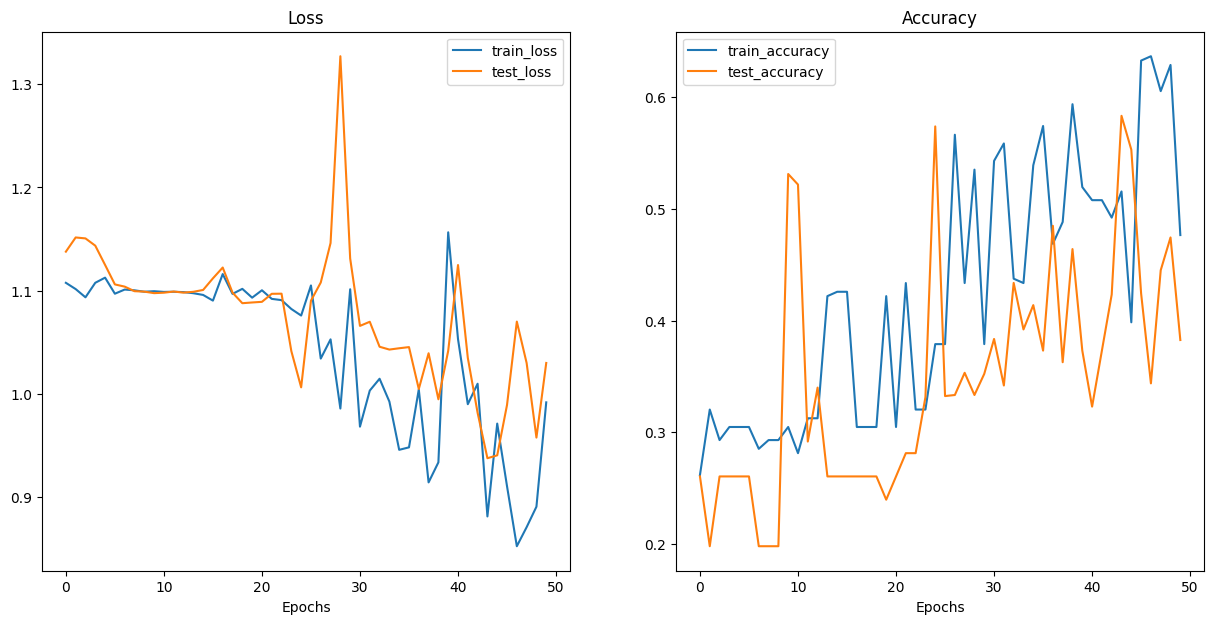

In [212]:
plot_loss_curves(model_0_results)

In [217]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() 
    
])

train_data_augmented = ImageFolderCustom(targ_dir=train_dir, 
                                      format_data = "jpg",
                                      transform=train_transforms)


BATCH_SIZE = 32
train_dataloader_augmented = DataLoader(train_data_custom, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=0)

train_data_augmented

In [218]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  2%|█▋                                                                                 | 1/50 [00:00<00:48,  1.01it/s]

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.2383 | test_loss: 1.1071 | test_acc: 0.2604


  4%|███▎                                                                               | 2/50 [00:02<00:49,  1.04s/it]

Epoch: 2 | train_loss: 1.0776 | train_acc: 0.4258 | test_loss: 1.1498 | test_acc: 0.2604


  6%|████▉                                                                              | 3/50 [00:03<00:48,  1.03s/it]

Epoch: 3 | train_loss: 1.0800 | train_acc: 0.4258 | test_loss: 1.1727 | test_acc: 0.2604


  8%|██████▋                                                                            | 4/50 [00:04<00:47,  1.02s/it]

Epoch: 4 | train_loss: 1.0814 | train_acc: 0.4258 | test_loss: 1.1610 | test_acc: 0.2604


 10%|████████▎                                                                          | 5/50 [00:05<00:45,  1.01s/it]

Epoch: 5 | train_loss: 1.0798 | train_acc: 0.4258 | test_loss: 1.1601 | test_acc: 0.2604


 12%|█████████▉                                                                         | 6/50 [00:06<00:43,  1.01it/s]

Epoch: 6 | train_loss: 1.1304 | train_acc: 0.3047 | test_loss: 1.1417 | test_acc: 0.2604


 14%|███████████▌                                                                       | 7/50 [00:06<00:42,  1.02it/s]

Epoch: 7 | train_loss: 1.1120 | train_acc: 0.3047 | test_loss: 1.0928 | test_acc: 0.2500


 16%|█████████████▎                                                                     | 8/50 [00:08<00:41,  1.01it/s]

Epoch: 8 | train_loss: 1.0966 | train_acc: 0.3711 | test_loss: 1.0942 | test_acc: 0.3201


 18%|██████████████▉                                                                    | 9/50 [00:08<00:40,  1.01it/s]

Epoch: 9 | train_loss: 1.0829 | train_acc: 0.5039 | test_loss: 1.0936 | test_acc: 0.2812


 20%|████████████████▍                                                                 | 10/50 [00:09<00:39,  1.01it/s]

Epoch: 10 | train_loss: 1.0986 | train_acc: 0.3203 | test_loss: 1.1038 | test_acc: 0.2708


 22%|██████████████████                                                                | 11/50 [00:11<00:38,  1.00it/s]

Epoch: 11 | train_loss: 1.0600 | train_acc: 0.4766 | test_loss: 1.0719 | test_acc: 0.2604


 24%|███████████████████▋                                                              | 12/50 [00:11<00:37,  1.01it/s]

Epoch: 12 | train_loss: 1.0724 | train_acc: 0.3672 | test_loss: 1.0670 | test_acc: 0.2812


 26%|█████████████████████▎                                                            | 13/50 [00:12<00:36,  1.02it/s]

Epoch: 13 | train_loss: 1.0362 | train_acc: 0.4258 | test_loss: 1.0568 | test_acc: 0.3324


 28%|██████████████████████▉                                                           | 14/50 [00:13<00:35,  1.02it/s]

Epoch: 14 | train_loss: 1.0993 | train_acc: 0.4336 | test_loss: 1.0005 | test_acc: 0.4432


 30%|████████████████████████▌                                                         | 15/50 [00:14<00:34,  1.00it/s]

Epoch: 15 | train_loss: 0.9963 | train_acc: 0.5703 | test_loss: 1.0129 | test_acc: 0.4744


 32%|██████████████████████████▏                                                       | 16/50 [00:15<00:33,  1.00it/s]

Epoch: 16 | train_loss: 0.9774 | train_acc: 0.5938 | test_loss: 0.9783 | test_acc: 0.5152


 34%|███████████████████████████▉                                                      | 17/50 [00:17<00:33,  1.01s/it]

Epoch: 17 | train_loss: 0.9667 | train_acc: 0.5430 | test_loss: 1.0131 | test_acc: 0.3826


 36%|█████████████████████████████▌                                                    | 18/50 [00:18<00:32,  1.01s/it]

Epoch: 18 | train_loss: 0.9451 | train_acc: 0.4844 | test_loss: 1.0830 | test_acc: 0.3627


 38%|███████████████████████████████▏                                                  | 19/50 [00:19<00:31,  1.02s/it]

Epoch: 19 | train_loss: 0.9152 | train_acc: 0.5742 | test_loss: 1.0269 | test_acc: 0.4441


 40%|████████████████████████████████▊                                                 | 20/50 [00:20<00:30,  1.02s/it]

Epoch: 20 | train_loss: 1.0372 | train_acc: 0.4336 | test_loss: 1.0207 | test_acc: 0.4432


 42%|██████████████████████████████████▍                                               | 21/50 [00:21<00:29,  1.01s/it]

Epoch: 21 | train_loss: 0.9413 | train_acc: 0.5586 | test_loss: 1.0517 | test_acc: 0.3930


 44%|████████████████████████████████████                                              | 22/50 [00:22<00:28,  1.00s/it]

Epoch: 22 | train_loss: 0.9872 | train_acc: 0.4688 | test_loss: 1.0418 | test_acc: 0.3722


 46%|█████████████████████████████████████▋                                            | 23/50 [00:23<00:27,  1.01s/it]

Epoch: 23 | train_loss: 0.9222 | train_acc: 0.5039 | test_loss: 1.0727 | test_acc: 0.3428


 48%|███████████████████████████████████████▎                                          | 24/50 [00:24<00:26,  1.00s/it]

Epoch: 24 | train_loss: 1.0042 | train_acc: 0.4648 | test_loss: 1.0386 | test_acc: 0.3930


 50%|█████████████████████████████████████████                                         | 25/50 [00:25<00:25,  1.03s/it]

Epoch: 25 | train_loss: 0.9537 | train_acc: 0.4883 | test_loss: 0.9670 | test_acc: 0.5256


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:26<00:24,  1.02s/it]

Epoch: 26 | train_loss: 0.8028 | train_acc: 0.6367 | test_loss: 1.0275 | test_acc: 0.3722


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:27<00:23,  1.01s/it]

Epoch: 27 | train_loss: 0.9255 | train_acc: 0.6211 | test_loss: 1.0173 | test_acc: 0.3617


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:28<00:21,  1.00it/s]

Epoch: 28 | train_loss: 0.8629 | train_acc: 0.6133 | test_loss: 1.0518 | test_acc: 0.3826


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:29<00:20,  1.01it/s]

Epoch: 29 | train_loss: 1.0870 | train_acc: 0.4883 | test_loss: 1.0383 | test_acc: 0.3826


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:30<00:20,  1.00s/it]

Epoch: 30 | train_loss: 0.9490 | train_acc: 0.5508 | test_loss: 1.1163 | test_acc: 0.3314


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:31<00:19,  1.01s/it]

Epoch: 31 | train_loss: 1.0973 | train_acc: 0.4492 | test_loss: 1.0372 | test_acc: 0.4034


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:32<00:18,  1.00s/it]

Epoch: 32 | train_loss: 0.9153 | train_acc: 0.6523 | test_loss: 1.0339 | test_acc: 0.3835


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:33<00:17,  1.02s/it]

Epoch: 33 | train_loss: 0.8725 | train_acc: 0.5742 | test_loss: 1.0334 | test_acc: 0.4044


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:34<00:16,  1.00s/it]

Epoch: 34 | train_loss: 0.9519 | train_acc: 0.6211 | test_loss: 1.0265 | test_acc: 0.3826


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:35<00:14,  1.01it/s]

Epoch: 35 | train_loss: 0.8702 | train_acc: 0.5820 | test_loss: 1.0967 | test_acc: 0.3314


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:36<00:14,  1.00s/it]

Epoch: 36 | train_loss: 0.8666 | train_acc: 0.5820 | test_loss: 1.0487 | test_acc: 0.3627


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [00:37<00:13,  1.01s/it]

Epoch: 37 | train_loss: 0.8027 | train_acc: 0.6445 | test_loss: 1.0130 | test_acc: 0.3920


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:38<00:11,  1.01it/s]

Epoch: 38 | train_loss: 0.8836 | train_acc: 0.6250 | test_loss: 1.0219 | test_acc: 0.4025


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:39<00:10,  1.00it/s]

Epoch: 39 | train_loss: 0.9935 | train_acc: 0.4922 | test_loss: 1.0421 | test_acc: 0.3826


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:40<00:09,  1.00it/s]

Epoch: 40 | train_loss: 0.8949 | train_acc: 0.6367 | test_loss: 0.9632 | test_acc: 0.5152


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:41<00:08,  1.01it/s]

Epoch: 41 | train_loss: 0.9936 | train_acc: 0.5039 | test_loss: 0.9452 | test_acc: 0.4943


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:42<00:07,  1.00it/s]

Epoch: 42 | train_loss: 0.8587 | train_acc: 0.5820 | test_loss: 1.0087 | test_acc: 0.4441


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:43<00:07,  1.00s/it]

Epoch: 43 | train_loss: 0.9593 | train_acc: 0.4961 | test_loss: 0.9711 | test_acc: 0.4441


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:44<00:05,  1.01it/s]

Epoch: 44 | train_loss: 0.8507 | train_acc: 0.6484 | test_loss: 0.9267 | test_acc: 0.6174


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:45<00:04,  1.02it/s]

Epoch: 45 | train_loss: 0.8669 | train_acc: 0.6289 | test_loss: 0.9395 | test_acc: 0.4640


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [00:45<00:03,  1.03it/s]

Epoch: 46 | train_loss: 0.8935 | train_acc: 0.6484 | test_loss: 1.0279 | test_acc: 0.3930


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:46<00:02,  1.03it/s]

Epoch: 47 | train_loss: 1.0608 | train_acc: 0.5078 | test_loss: 1.0535 | test_acc: 0.4337


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:47<00:01,  1.03it/s]

Epoch: 48 | train_loss: 0.8977 | train_acc: 0.6094 | test_loss: 1.0541 | test_acc: 0.4138


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [00:48<00:00,  1.03it/s]

Epoch: 49 | train_loss: 0.8798 | train_acc: 0.6133 | test_loss: 1.0050 | test_acc: 0.4839


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:49<00:00,  1.00it/s]

Epoch: 50 | train_loss: 0.8982 | train_acc: 0.5156 | test_loss: 0.9656 | test_acc: 0.4735
Total training time: 49.859 seconds


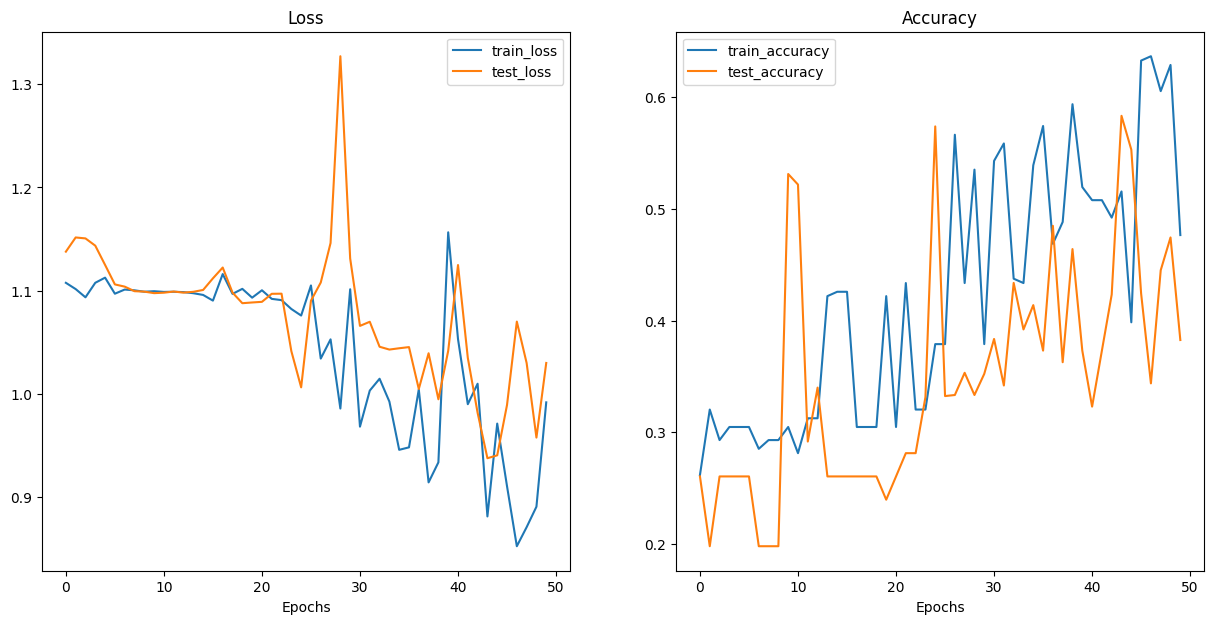

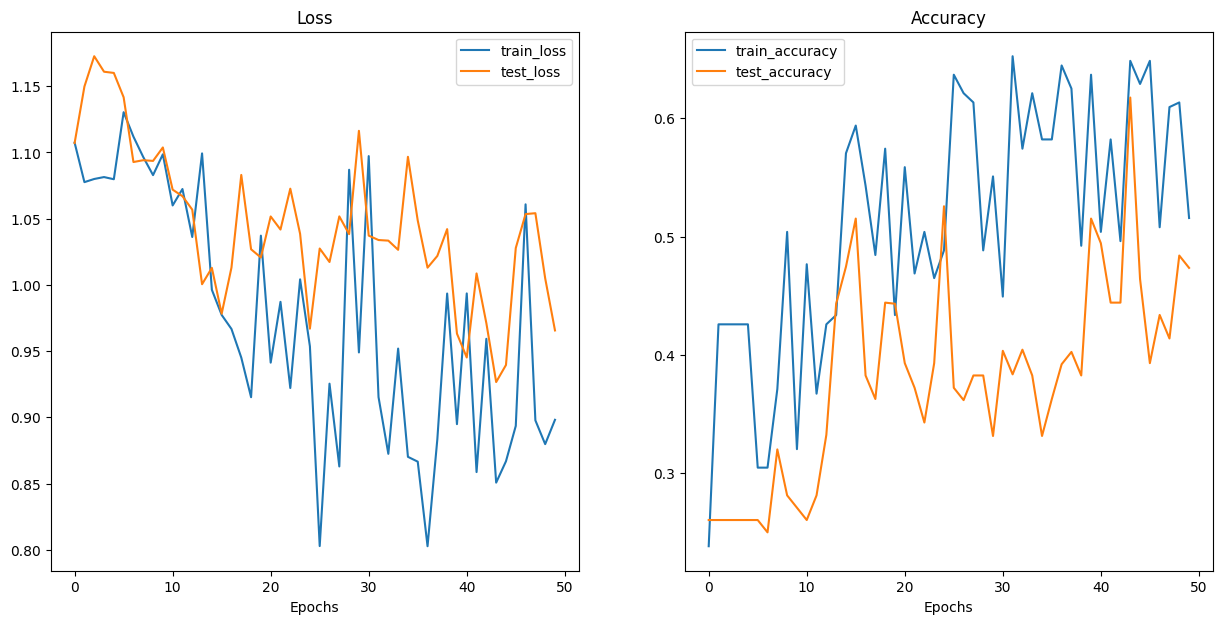

In [219]:
plot_loss_curves(model_0_results)
plot_loss_curves(model_1_results)

In [221]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df.head()

,train_loss,train_acc,test_loss,test_acc
0,1.107642,0.261719,1.137817,0.260417
1,1.101568,0.320312,1.151585,0.197917
2,1.093595,0.292969,1.150661,0.260417
3,1.107670,0.304688,1.143624,0.260417
4,1.112638,0.304688,1.124982,0.260417


# Visualize all models data

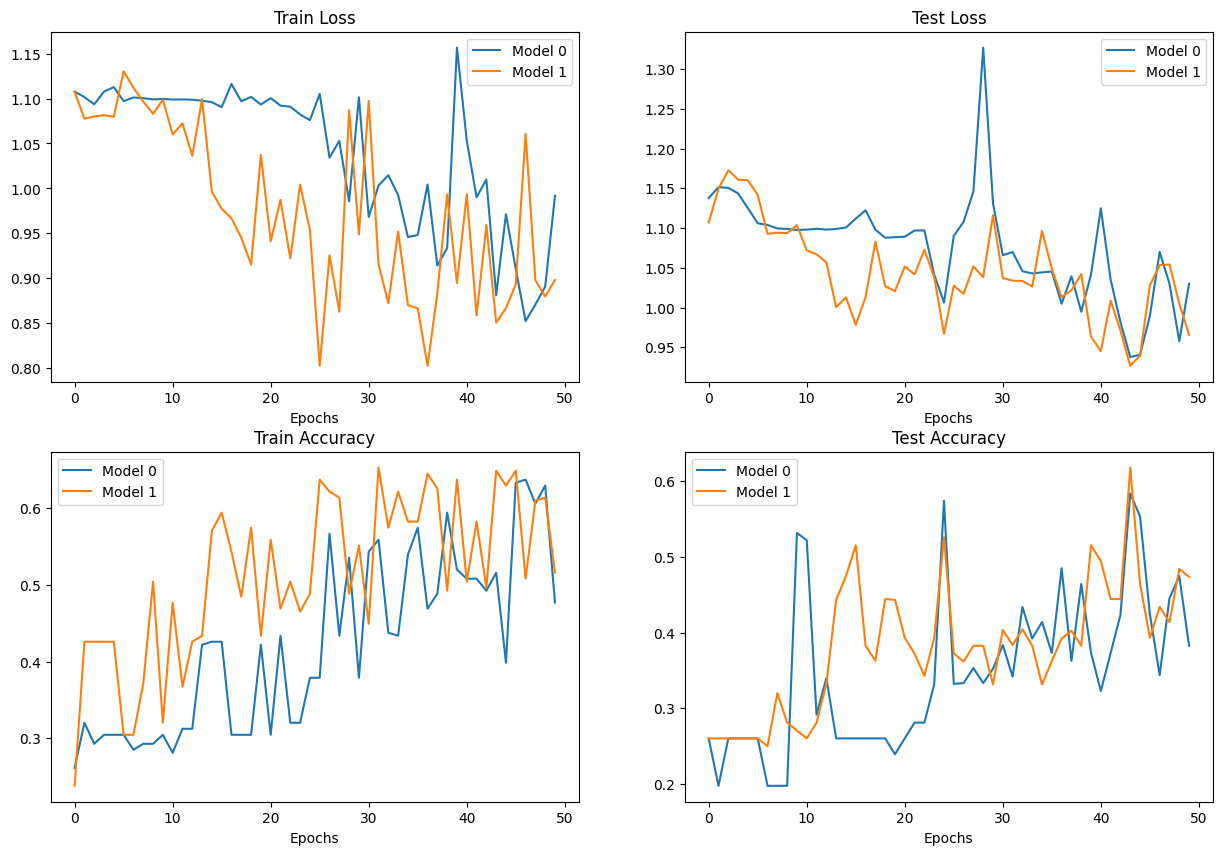

In [223]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

# Load and check predict other image

In [259]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

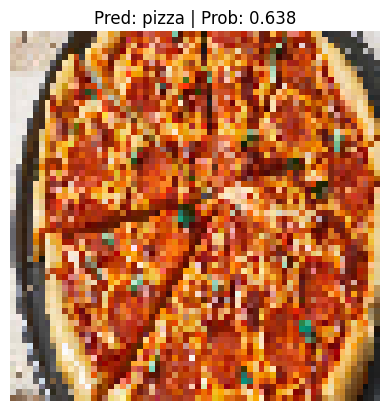

In [262]:
path_pizza = "Dataset\pizza_steak_sushi\other/pizza2.jpg" 
pred_and_plot_image(model=model_1,
                    image_path=path_pizza,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

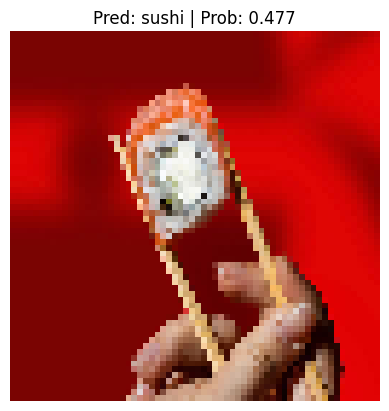

In [271]:
# USE MODEL-0
path_ = "Dataset\pizza_steak_sushi\other/rolls.jpg" 
pred_and_plot_image(model=model_0,
                    image_path=path_,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

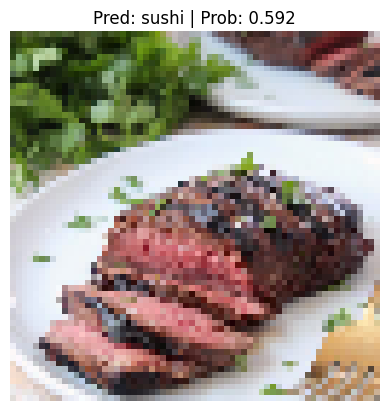

In [273]:
# USE MODEL-1
path_ = "Dataset\pizza_steak_sushi\other/steak.jpg" 
pred_and_plot_image(model=model_1,
                    image_path=path_,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)